# Analysis of Top 100 Spotify Tracks of 2018

#### At the end of each year, Spotify compiles a playlist of the songs streamed most often over the course of that year. The playlist Top Tracks of 2018 includes 100 songs. The question is: What do these top songs have in common? Why do people like them?

#### Data Source: Kaggle

#### Data Description: There is one .csv file in the dataset. (2018.csv) This file includes:
1. Spotify URI for the song
2. Name of the song
3. Artist(s) of the song
4. Audio features for the song (such as danceability, tempo, key etc.)

##### At the end of this notebook, we will provide a conclusion of our study

### Import Numpy, Pandas, Matplotlib, Seaborn and Scipy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline
sns.set_style('darkgrid')

### Read the csv file as a Dataframe named df

In [2]:
df = pd.read_csv('2018.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


In [4]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


### Conversion of column 'duration_ms' into standard format (i.e. from mili seconds to minutes)

In [5]:
df['Duration_min'] = df['duration_ms'] / 60000

In [6]:
df.drop(columns='duration_ms',inplace=True)

### Identification of correlation between columns

For this we will make use pf corr() function of pandas to create a heat map to find the correlation between various columns.

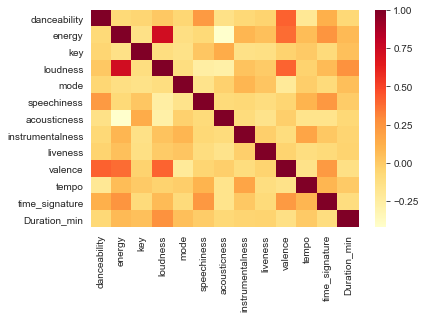

In [7]:
sns.heatmap(df.corr(),cmap="YlOrRd")

<strong>Analysis</strong>: At our first glance of the Heat Map, we see that the strongest correlation exists between 'Loudness' and 'Energy'. But it is out duty to explore behaviour of other columns too.

### Top 5 Artists with Maximum Presence in 2018

In [8]:
df['artists'].value_counts().head(5)

Post Malone     6
XXXTENTACION    6
Drake           4
Ed Sheeran      3
Marshmello      3
Name: artists, dtype: int64

### Danceability Column Analysis

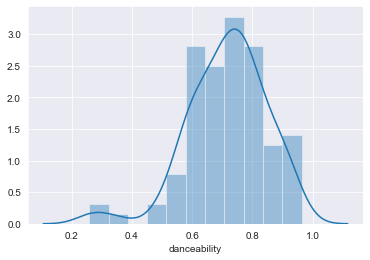

In [9]:
sns.distplot(df['danceability'],hist=True,kde=True)

<b>Analysis</b>: In this graph we can see that all tracks with value greater than 0.5 are considered danceable. To make better analysis, let us divide them into 3 groups:
1. Greater than 75%: Very Danceable
2. Greater than 50% & Less than 75%: Regularly Danceable
3. Less than 50%: Non Danceable

In [10]:
Vd=df['danceability']>=0.75
Rd=(df['danceability']>=0.5) & (df['danceability']<0.75)
Nd=df['danceability']<0.5

In [11]:
data=[Vd.sum(),Rd.sum(),Nd.sum()]

In [12]:
Dance=pd.DataFrame(data,columns=['Percent'],
                   index=['Very Danceable','Regularly Danceable','Instrumental'])
Dance

,Percent
Very Danceable,43
Regularly Danceable,53
Instrumental,4


### Energy Column Analysis

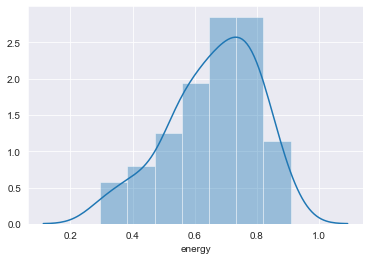

In [13]:
sns.distplot(df['energy'],hist=True,kde=True)

<b>Analysis</b>: In this graph we can see that all tracks with value greater than 0.5 are considered energetic. To make better analysis, let us divide them into 3 groups:
1. Greater than 75%: Very Energetic
2. Greater than 50% & Less than 75%: Regularly Energetic
3. Less than 50%: Non Energetic

In [14]:
Ve=df['energy']>=0.75
Re=(df['energy']>=0.5) & (df['energy']<0.75)
Le=df['energy']<0.5

In [15]:
data=[Ve.sum(),Re.sum(),Le.sum()]
Energy=pd.DataFrame(data,columns=['Percent'],
                   index=['Very Energetic','Regular Energetic','Low Energetic'])
Energy

,Percent
Very Energetic,32
Regular Energetic,55
Low Energetic,13


### Correlation Zone

We will consider the most important columns according to the preliminary analysis of Heat Map previously seen

In [16]:
Correlation=df[['danceability','energy','valence','loudness','tempo']]

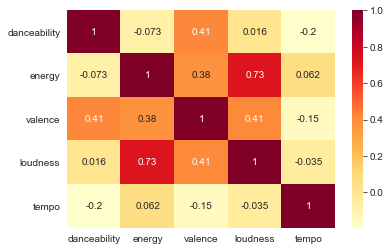

In [17]:
sns.heatmap(Correlation.corr(),annot=True,cmap="YlOrRd")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


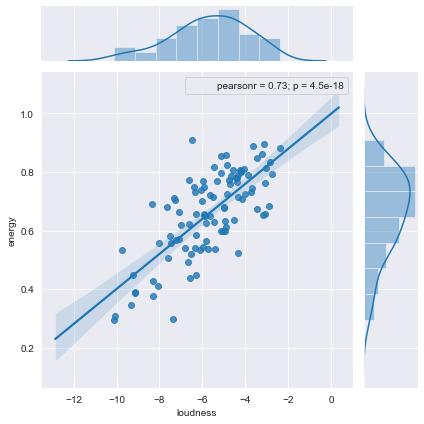

In [18]:
sns.jointplot(data=Correlation,y='energy',x='loudness',kind='reg',stat_func=pearsonr)
# Pearson's R is a measure of Linear Correlation between two variables X and Y

<b>Analysis</b>: We can clearly observe that as the values of loudness are closer to zero the probability that our song has a high content of energy is higher, in general these values should be kept below zero but not very far away.

### Musical Tempo

Musical Tempo is defined as the speed or pace at which a section of music is played. Tempo helps the composer to convey a feeling of either intensity or relaxation. We can think of the tempo as the speedometer of the music. Typically, the speed of the music is measured in beats per minute, or BPM.

The 5 most usual ones were:

1. Length: very slow (20 bpm)
2. Adagio: slow and majestic (66 to 76 bpm)
3. Andante: at the pace, quiet, a little vivacious (76 to 108 bpm)
4. Allegro: animated and fast. (108 to 168 bpm).
5. Presto: very fast (168 to 200 bpm).

In [19]:
def Rhythm(value):
    if value <= 66:
        return 'Length'
    elif value > 66 and value <= 76:
        return 'Adagio'
    elif value > 76 and value <= 108:
        return 'Andante'
    elif value > 108 and value <= 168:
        return 'Allegro'
    elif value > 168 and value <= 200:
        return 'Presto'

In [20]:
df['Rhythm'] = df['tempo'].apply(Rhythm)
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Duration_min,Rhythm
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,4.0,3.316217,Andante
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,4.0,2.776767,Adagio
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,4.0,3.635783,Allegro
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,4.0,3.690667,Allegro
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,4.0,3.632083,Andante


### Classification according to Tempo

In [21]:
df['Rhythm'].value_counts()

Allegro    47
Andante    44
Presto      7
Length      1
Adagio      1
Name: Rhythm, dtype: int64

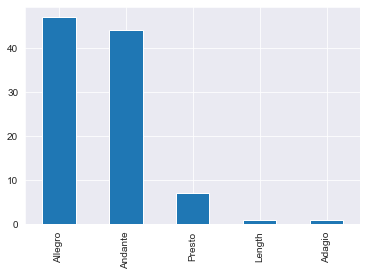

In [22]:
df['Rhythm'].value_counts().plot.bar()

<b>Note</b>: We can see that most of the Top 100 songs have Allegro and Andante as their Rhythm. These are characteristic of Genres:
1. Hip Hop
2. Pop
3. Rap

### Top 10 Most Danceable Songs

In [23]:
df[['name','artists','danceability','energy','valence','tempo','Rhythm']].sort_values(by='danceability',ascending=False).head(10)

,name,artists,danceability,energy,valence,tempo,Rhythm
91,Yes Indeed,Lil Baby,0.964,0.346,0.562,119.958,Allegro
55,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,0.931,0.387,0.376,125.978,Allegro
19,Look Alive (feat. Drake),BlocBoy JB,0.922,0.581,0.595,140.022,Allegro
18,Moonlight,XXXTENTACION,0.921,0.537,0.711,128.009,Allegro
61,Nonstop,Drake,0.912,0.412,0.422,154.983,Allegro
89,Bella,Wolfine,0.909,0.493,0.844,94.016,Andante
73,Walk It Talk It,Migos,0.909,0.628,0.406,145.905,Allegro
82,HUMBLE.,Kendrick Lamar,0.908,0.621,0.421,150.011,Allegro
21,Te Bot? - Remix,Nio Garcia,0.903,0.675,0.442,96.507,Andante
30,Taste (feat. Offset),Tyga,0.884,0.559,0.342,97.994,Andante


In [ ]:
plt.subplot(1,2,1)
sns.barplot(x='Rhythm', y='energy', data=df, palette='coolwarm')
plt.tight_layout()

plt.subplot(1,2,2)
sns.barplot(x='Rhythm', y='valence', data=df, palette='coolwarm')
plt.tight_layout()

### Top 10 Most Energetic Songs

In [ ]:
df[['name','artists','danceability','energy','valence','tempo','Rhythm']].sort_values(by='energy',ascending=False).head(10)

In [ ]:
plt.subplot(1,2,1)
sns.barplot(x='Rhythm', y='danceability', data=df, palette='coolwarm')
plt.tight_layout()

plt.subplot(1,2,2)
sns.barplot(x='Rhythm', y='valence', data=df, palette='coolwarm')
plt.tight_layout()

### Top 10 Most Positive Songs

Tracks with High Valence sound more positive, while Tracks with Low Valence sound negative

In [ ]:
df[['name','artists','danceability','energy','valence','tempo','Rhythm']].sort_values(by='valence',ascending=False).head(10)

In [ ]:
plt.subplot(1,2,1)
sns.barplot(x='Rhythm', y='danceability', data=df, palette='coolwarm')
plt.tight_layout()

plt.subplot(1,2,2)
sns.barplot(x='Rhythm', y='energy', data=df, palette='coolwarm')
plt.tight_layout()

<b>Analysis</b>: The Top 10 Songs in the above categories show that songs with categories Andante are more positive and songs with categories Allegro are more danceable.

### Analysis of Best Artists

In [ ]:
df['artists'].value_counts().head(3)

### Artist: Post Malone

In [ ]:
PostMalone=df[df['artists']=='Post Malone']
PostMalone[['name','danceability','energy','loudness','valence','tempo','Rhythm']]

In [ ]:
sns.countplot(x='Rhythm', data=PostMalone, palette='coolwarm')

### Artist: XXXTENTACION

In [ ]:
XXXTENTACION=df[df['artists']=='XXXTENTACION']
XXXTENTACION[['name','danceability','energy','loudness','valence','tempo','Rhythm']]

In [ ]:
sns.countplot(x='Rhythm', data=XXXTENTACION, palette='coolwarm')

### Artist: Drake

In [ ]:
Drake=df[df['artists']=='Drake']
Drake[['name','danceability','energy','loudness','valence','tempo','Rhythm']]

In [ ]:
sns.countplot(x='Rhythm', data=Drake, palette='coolwarm')

<b>Analysis</b>: Out of the Top 3 artists, 2 of them are more inclined towards Allegro and Drake is more inclined towards Andante.

### Analysis of column 'Mode'

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
We will analyze the data in such a way that we will only consider columns having danceability and energy greater than 0.5 because most of the data are concentrated in these ranges and we do not want values lower than 0.5, affecting a possible correlation between columns.

In [ ]:
Major = df[df['mode']==1]
Minor = df[df['mode']==0]

In [ ]:
Major = Major[(Major['danceability']>=0.5) | (Major['energy']>=0.5)]
Minor = Minor[(Minor['danceability']>=0.5) | (Minor['energy']>=0.5)]

In [ ]:
# Considering only the most important columns
Major=Major[['danceability','energy','valence','loudness','tempo']]
Minor=Minor[['danceability','energy','valence','loudness','tempo']]

In [ ]:
sns.heatmap(Major.corr(),cmap="YlOrRd")

In [ ]:
sns.heatmap(Minor.corr(),cmap="YlOrRd")

<b>Analysis</b>: As we can observe the tracks with minor scales show us correlation better between the most important variables.

### Analysis on the basis of column 'key'

The column 'key' has integer values which needs to be mapped to the original Pitch Class Notation. For Example 0='C', 1='C#', 2='D'

In [ ]:
df.loc[ df['key']==0 ,'key']='C'    
df.loc[ df['key']==1 ,'key']='C#'    
df.loc[ df['key']==2 ,'key']='D'    
df.loc[ df['key']==3 ,'key']='D#'    
df.loc[ df['key']==4 ,'key']='E'    
df.loc[ df['key']==5 ,'key']='F'    
df.loc[ df['key']==6 ,'key']='F#'    
df.loc[ df['key']==7 ,'key']='G'    
df.loc[ df['key']==8 ,'key']='G#'    
df.loc[ df['key']==9 ,'key']='A'    
df.loc[ df['key']==10 ,'key']='A#' 
df.loc[ df['key']==11 ,'key']='B'

In [ ]:
sns.countplot(x='key', data=df, palette='coolwarm')

<b>Analysis</b>: We can see that maximum of the tracks belong to the key 'C#' followed by 'G#'.

In [ ]:
df[['danceability','key']].groupby(by='key').mean().sort_values(by='danceability',ascending=False)

In [ ]:
sns.barplot(x='key', y='danceability', data=df, palette='coolwarm')

<b>Analysis</b>: We conclude that tracks having key 'G' and 'C#' are the most Danceable Songs.

In [ ]:
df[['energy','key']].groupby(by='key').mean().sort_values(by='energy',ascending=False)

In [ ]:
sns.barplot(x='key', y='energy', data=df, palette='coolwarm')

<b>Analysis</b>: We conclude that tracks having key 'F#' are the most Energetic Songs.

In [ ]:
df[['valence','key']].groupby(by='key').mean().sort_values(by='valence',ascending=False)

In [ ]:
sns.barplot(x='key', y='valence', data=df, palette='coolwarm')

<b>Analysis</b>: We conclude that tracks having key 'A' and 'C#' are the most Positive Songs.

## Conclusion

To answer the 2 initial questions posed by this data set, we can say that there was only a correlation between energy and loudness, on the other hand, you can see that the main reason for people to like these songs is in relation to the rhythm of the track, let's say that most of the tracks were within the range "ALLEGRO" and "ANDANTE" that are characteristic of the genres:

1. Hip hop
2. Pop
3. Rap

We further concluded the relation between various keys and danceability, eneergy and valence based on which we analysed the top energetic, danceable and positive tracks.